# the questions we will answer
* How have movie genres evolved over the years? (Use Released_Year and Genre columns)

* Analyze trends in genre popularity across different time periods.
Is there a correlation between a movie's IMDB rating and its box office gross? (Use IMDB_Rating and Gross columns)

* Determine if higher-rated movies tend to earn more at the box office.
Does a higher Meta_score correlate with a higher IMDB rating? (Use Meta_score and IMDB_Rating columns)

* Examine the relationship between critic scores and audience ratings.
What is the distribution of movie certificates (ratings), and how do they affect IMDB ratings? (Use Certificate and IMDB_Rating columns)

* Which directors have the highest average IMDB ratings? (Use Director and IMDB_Rating columns)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


# Clean the data 

In [4]:
data.isna().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [5]:
data["Certificate"].value_counts(dropna=False)

U           234
A           197
UA          175
R           146
NaN         101
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
16            1
TV-MA         1
Unrated       1
U/A           1
Name: Certificate, dtype: int64

In [6]:
# i will reduce all that in smaller groups 
#mapping 
rating_maping = {
    'U': 'General Audience',
    'G': 'General Audience',
    'PG': 'General Audience',
    'GP': 'General Audience',
    'TV-PG': 'General Audience',
    'Passed': 'General Audience',
    'Approved': 'General Audience',
    'PG-13': 'Parental Guidance',
    'UA': 'Parental Guidance',
    'U/A': 'Parental Guidance',
    'A': 'Restricted',
    'R': 'Restricted',
    'TV-14': 'Restricted',
    'TV-MA': 'Restricted',
    '16': 'Restricted',
    'Unrated': 'Unrated'
}

# apply the mapping 
data["consolidated_rating"] = data["Certificate"].replace(rating_maping)

In [7]:
data=data.drop("Certificate",axis=1)
data

,Poster_Link,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,consolidated_rating
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469",Restricted
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411",Restricted
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444",Parental Guidance
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000",Restricted
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000",General Audience
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN,Restricted
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN,General Audience
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000",General Audience
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN,NaN


In [8]:
data["consolidated_rating"].value_counts(dropna=False)

Restricted           346
General Audience     333
Parental Guidance    219
NaN                  101
Unrated                1
Name: consolidated_rating, dtype: int64

In [9]:
data["consolidated_rating"] = data["consolidated_rating"].fillna("Unrated")

In [10]:
data["consolidated_rating"].value_counts(dropna=False)

Restricted           346
General Audience     333
Parental Guidance    219
Unrated              102
Name: consolidated_rating, dtype: int64

In [11]:
# nanas in metascore now 
data["Meta_score"].value_counts(dropna=False)

NaN     157
76.0     32
84.0     29
90.0     29
80.0     27
       ... 
28.0      1
36.0      1
46.0      1
30.0      1
41.0      1
Name: Meta_score, Length: 64, dtype: int64

In [12]:
data["Meta_score"] = data["Meta_score"].fillna(data["IMDB_Rating"]*10)

In [13]:
data["Meta_score"].value_counts(dropna=False)


81.0    66
80.0    51
82.0    50
77.0    39
79.0    39
        ..
28.0     1
36.0     1
46.0     1
30.0     1
41.0     1
Name: Meta_score, Length: 63, dtype: int64

In [14]:
# now lets deal with gross nans
data["Gross"].value_counts(dropna=False)

NaN            169
4,360,000        5
9,600,000        2
25,000,000       2
5,450,000        2
              ... 
106,662          1
10,950           1
4,018,695        1
141,319,928      1
30,500,000       1
Name: Gross, Length: 824, dtype: int64

In [15]:
# Display rows where 'Gross' column has NaN values
nan_gross_rows = data[data['Gross'].isna()]
nan_gross_rows["Released_Year"].value_counts()

1962    10
2019     7
2020     6
1957     5
2018     5
        ..
1947     1
1945     1
1934     1
2007     1
1935     1
Name: Released_Year, Length: 77, dtype: int64

In [16]:
# they are mainly old movies, at the moment i will leave the nans there 

##  "What are the most popular movie genres over time in my dataset?"

In [17]:
#Pivoting the Data: The unstack(fill_value=0) method pivots the data to create a matrix where each row represents a year,
# each column represents a genre, and the values are the counts of movies in that genre for that year.
genre_evolution = data.groupby(['Released_Year', 'Genre']).size().unstack(fill_value=0)
genre_evolution

Genre,"Action, Adventure","Action, Adventure, Biography","Action, Adventure, Comedy","Action, Adventure, Crime","Action, Adventure, Drama","Action, Adventure, Family","Action, Adventure, Fantasy","Action, Adventure, History","Action, Adventure, Horror","Action, Adventure, Mystery",...,Horror,"Horror, Mystery, Sci-Fi","Horror, Mystery, Thriller","Horror, Sci-Fi","Horror, Thriller","Mystery, Romance, Thriller","Mystery, Sci-Fi, Thriller","Mystery, Thriller",Thriller,Western
Released_Year,,,,,,,,,,,,,,,,,,,,,
1920,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1921,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1922,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1924,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1925,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,0,0,2,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2018,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


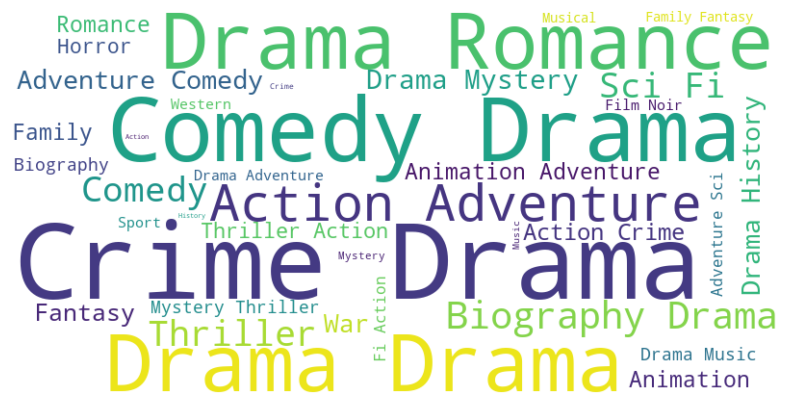

In [18]:
# Grouping and counting by year and genre
genre_yearly = data.groupby(['Released_Year', 'Genre']).size()

# Creating a string where genres are repeated according to their frequency each year
genre_string = ''
for (year, genre), count in genre_yearly.items():
    genre_string += (' ' + genre) * count

# Generating the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genre_string)

# Displaying the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### What this word cloud is 
*  first group the data by year and genre, then create a string that repeats each genre name based on its frequency for each year. This string is then used to generate the word cloud. The resulting word cloud will give more weight to genres that are not only frequent overall but also consistently popular across different years

### for presentation pourpouses
* Each genre is represented by a word in the cloud.
The size of each word is influenced by how often the genre appears in the dataset and its distribution across different years.

## Conclusion on first question  "What are the most popular movie genres over time in my dataset?"
* Clearly drama ,drama and drama are very dominant, they even appear several times because movies dont use to have only one genre .
* Another conclusion is that we have a really spread range of different genres even if they are less dominant there are a lot!

## Next question :
* Analyze trends in genre popularity across different time periods. Is there a correlation between a movie's IMDB rating and its box office gross? 
* To put it easier ,does better rated movies win more money?lets find out.


In [19]:
# Drop rows with NaN values for clarity in visualization.
data = data.dropna(subset=['IMDB_Rating', 'Gross'])
data['Gross'] = data['Gross'].str.replace(',', '').astype(int)

C:\Users\Admin\AppData\Local\Temp\ipykernel_36424\3794661503.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gross'] = data['Gross'].str.replace(',', '').astype(int)


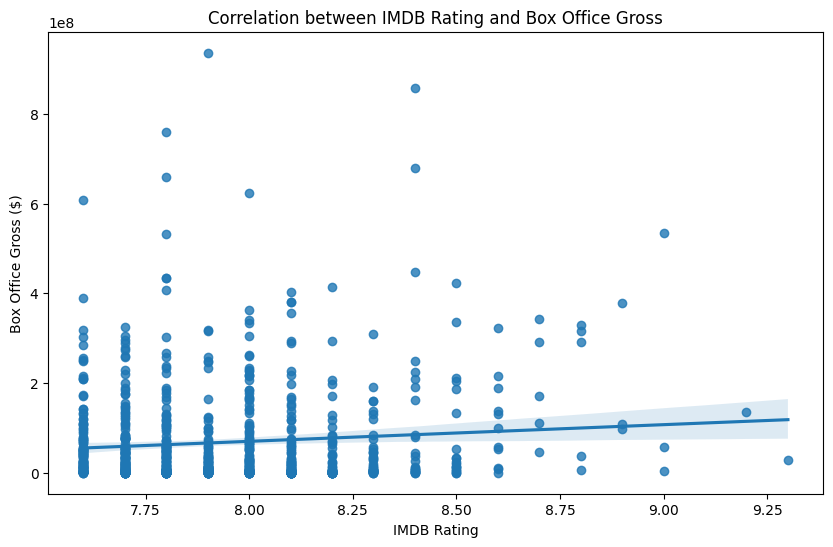

The correlation coefficient between IMDB Rating and Box Office Gross is: 0.10


In [20]:

# seaborn to create a scatter plot and fit a regression line to the data.
plt.figure(figsize=(10, 6))
sns.regplot(x='IMDB_Rating', y='Gross', data=data)

# Setting the title and labels.
plt.title('Correlation between IMDB Rating and Box Office Gross')
plt.xlabel('IMDB Rating')
plt.ylabel('Box Office Gross ($)')
plt.show()

# Calculate the correlation coefficient between 'IMDB_Rating' and 'Gross'.
correlation = data['IMDB_Rating'].corr(data['Gross'])
print(f"The correlation coefficient between IMDB Rating and Box Office Gross is: {correlation:.2f}")

In [21]:
data['Released_Year'].replace('PG', '1970', inplace=True)
data["Released_Year"]=data["Released_Year"].astype(int)

C:\Users\Admin\AppData\Local\Temp\ipykernel_36424\3544186822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Released_Year'].replace('PG', '1970', inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_36424\3544186822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Released_Year"]=data["Released_Year"].astype(int)


In [22]:
# looks like this may be affected by the inflation ,a ver famous and good movie in 1950 cant compite with today inflation.
# so either i get the inflation rate for the years from another database or i separe it in 3 groups and i make it individually,i will chose second option
# Define the function to categorize movies by year
def categorize_movies(year):
    if year < 1980:
        return 'Very Old Movies'
    elif year < 2000:
        return 'Old Movies'
    else:
        return 'Recent Movies'

# Apply the categorization function to the 'Released_Year' column
data['Movie_Age_Group'] = data['Released_Year'].apply(categorize_movies)

C:\Users\Admin\AppData\Local\Temp\ipykernel_36424\3569134986.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Movie_Age_Group'] = data['Released_Year'].apply(categorize_movies)


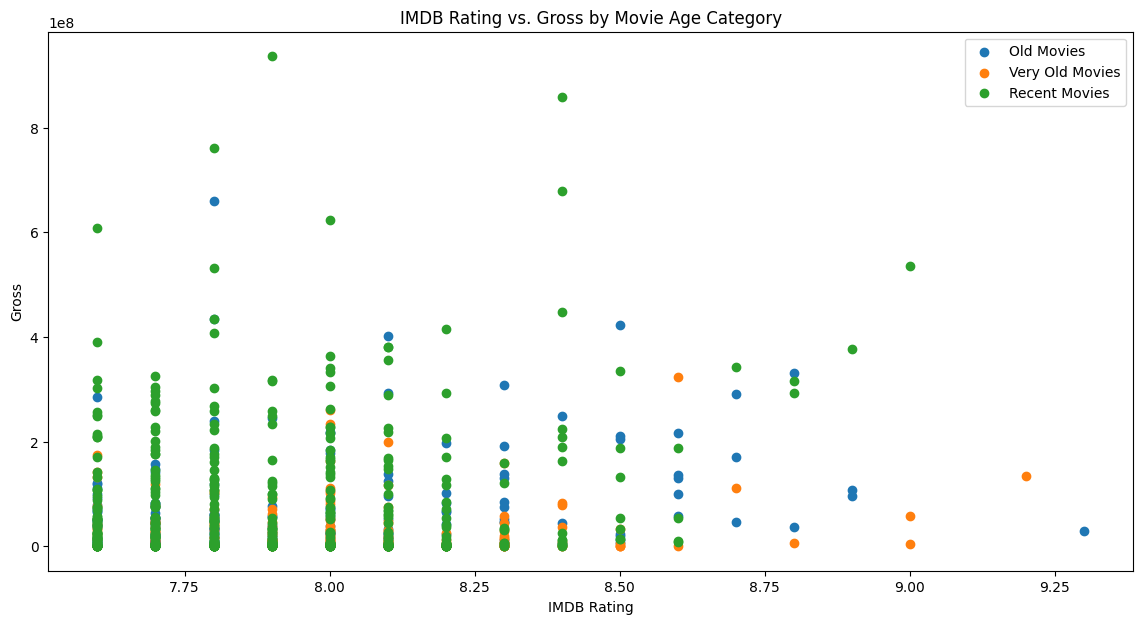

The correlation coefficient for Old Movies is: 0.22
The correlation coefficient for Very Old Movies is: 0.02
The correlation coefficient for Recent Movies is: 0.13


In [23]:
# Create a scatter plot for each category
plt.figure(figsize=(14, 7))

# Filter the data by category and plot
for category in data['Movie_Age_Group'].unique():
    subset = data[data['Movie_Age_Group'] == category]
    plt.scatter(subset['IMDB_Rating'], subset['Gross'], label=category)

# Add details to the plot
plt.xlabel('IMDB Rating')
plt.ylabel('Gross')
plt.title('IMDB Rating vs. Gross by Movie Age Category')
plt.legend()
plt.show()

# You might also want to compute and display the correlation coefficient within each category.
for category in data['Movie_Age_Group'].unique():
    subset = data[data['Movie_Age_Group'] == category]
    correlation = subset['IMDB_Rating'].corr(subset['Gross'])
    print(f"The correlation coefficient for {category} is: {correlation:.2f}")

## CONCLUSION and asnwers to the question Does the imdb rating of the movie give more money to the makers?
* Short answer ,it doesnt, the coefficient even if we try to avoid inflation still small, they increased a bit in the old movies group but still almost 0.10 in recent movies.

## Next question
* Determine if higher-rated movies tend to earn more at the box office. Does a higher Meta_score correlate with a higher IMDB rating?

The correlation coefficient between Meta_score and IMDB Rating is: 0.29


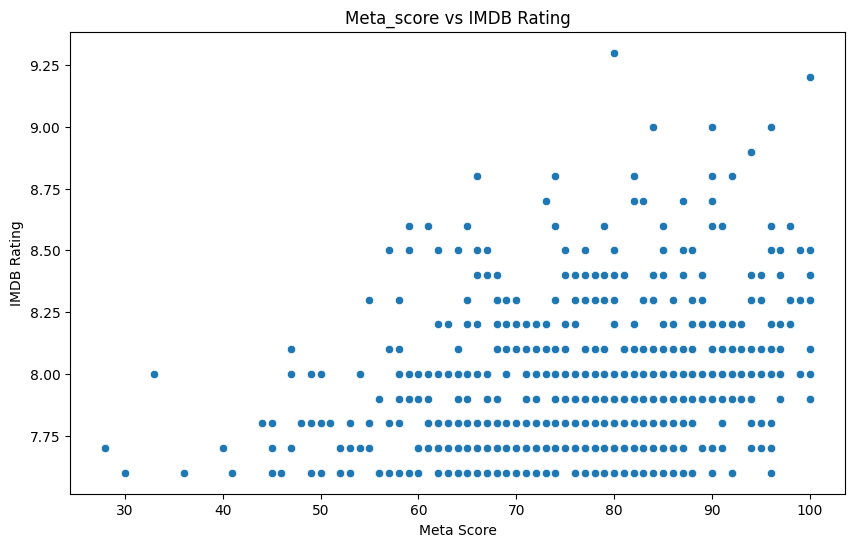

In [25]:
# First, we'll check the correlation between Meta_score and IMDB_Rating.
meta_imdb_corr = data['Meta_score'].corr(data['IMDB_Rating'])
print(f"The correlation coefficient between Meta_score and IMDB Rating is: {meta_imdb_corr:.2f}")

# Now, let's visualize the relationship between Meta_score and IMDB_Rating with a scatter plot.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Meta_score', y='IMDB_Rating')
plt.title('Meta_score vs IMDB Rating')
plt.xlabel('Meta Score')
plt.ylabel('IMDB Rating')
plt.show()

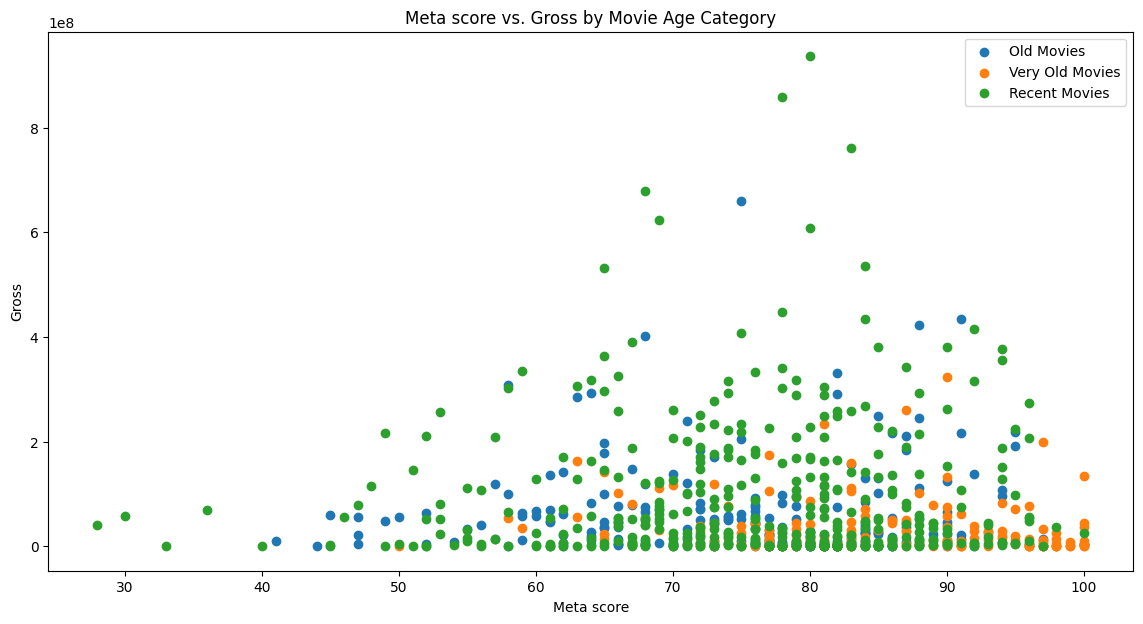

The correlation coefficient for Old Movies is: 0.03
The correlation coefficient for Very Old Movies is: -0.14
The correlation coefficient for Recent Movies is: 0.02


In [28]:
# Create a scatter plot for each category
plt.figure(figsize=(14, 7))

# Filter the data by category and plot
for category in data['Movie_Age_Group'].unique():
    subset = data[data['Movie_Age_Group'] == category]
    plt.scatter(subset['Meta_score'], subset['Gross'], label=category)

# Add details to the plot
plt.xlabel('Meta score')
plt.ylabel('Gross')
plt.title('Meta score vs. Gross by Movie Age Category')
plt.legend()
plt.show()

# You might also want to compute and display the correlation coefficient within each category.
for category in data['Movie_Age_Group'].unique():
    subset = data[data['Movie_Age_Group'] == category]
    correlation = subset['Meta_score'].corr(subset['Gross'])
    print(f"The correlation coefficient for {category} is: {correlation:.2f}")

### The conclusion is that there is some correlation between imdb and meta scores but is very weak, and then we see that is still no correlation between the gross value and the meta score

## Next question
* Examine the relationship between critic scores and audience ratings.
What is the distribution of movie certificates (ratings), and how do they affect IMDB ratings? 

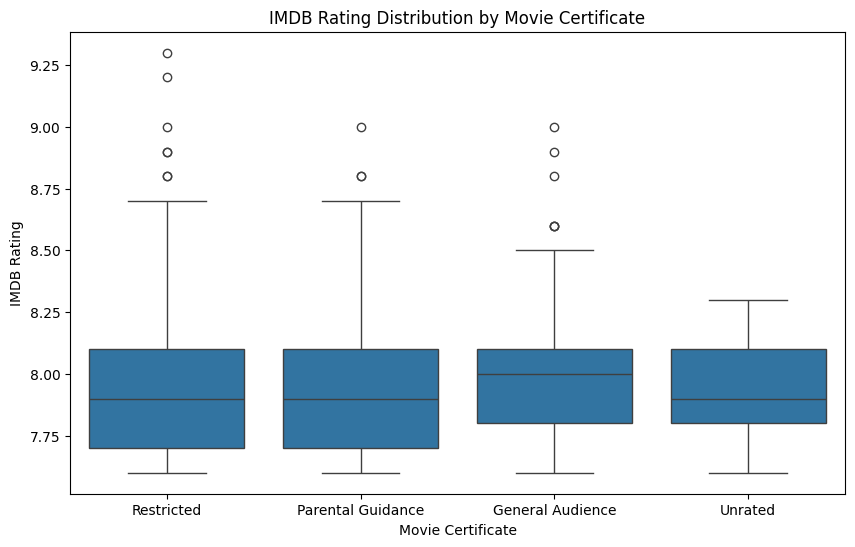

In [30]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='consolidated_rating', y='IMDB_Rating', data=data)
plt.title('IMDB Rating Distribution by Movie Certificate')
plt.xlabel('Movie Certificate')
plt.ylabel('IMDB Rating')
plt.show()

In [31]:
# Additionally, we can calculate summary statistics for each group to understand the distribution better.
grouped_data = data.groupby('consolidated_rating')['IMDB_Rating'].describe()
grouped_data

,count,mean,std,min,25%,50%,75%,max
consolidated_rating,,,,,,,,
General Audience,266.0,7.973684,0.267735,7.6,7.8,8.0,8.1,9.0
Parental Guidance,203.0,7.917241,0.272044,7.6,7.7,7.9,8.1,9.0
Restricted,315.0,7.946667,0.311581,7.6,7.7,7.9,8.1,9.3
Unrated,47.0,7.925532,0.195012,7.6,7.8,7.9,8.1,8.3


# conclusion 
* Looks like the data is pretty even but we see that the absolute best movies are in the restricted area actually.

# Lets go for the last question, who are the money makers?

In [32]:
# Calculate the average IMDB rating for each director
average_ratings = data.groupby('Director')['IMDB_Rating'].mean().sort_values(ascending=False)

# Display the results
average_ratings

Director
Frank Darabont        8.95
Irvin Kershner        8.70
Lana Wachowski        8.70
Fernando Meirelles    8.60
Roberto Benigni       8.60
                      ... 
Jonathan Levine       7.60
Eric Bress            7.60
Tony Bancroft         7.60
Jonathan Lynn         7.60
Alex Proyas           7.60
Name: IMDB_Rating, Length: 472, dtype: float64

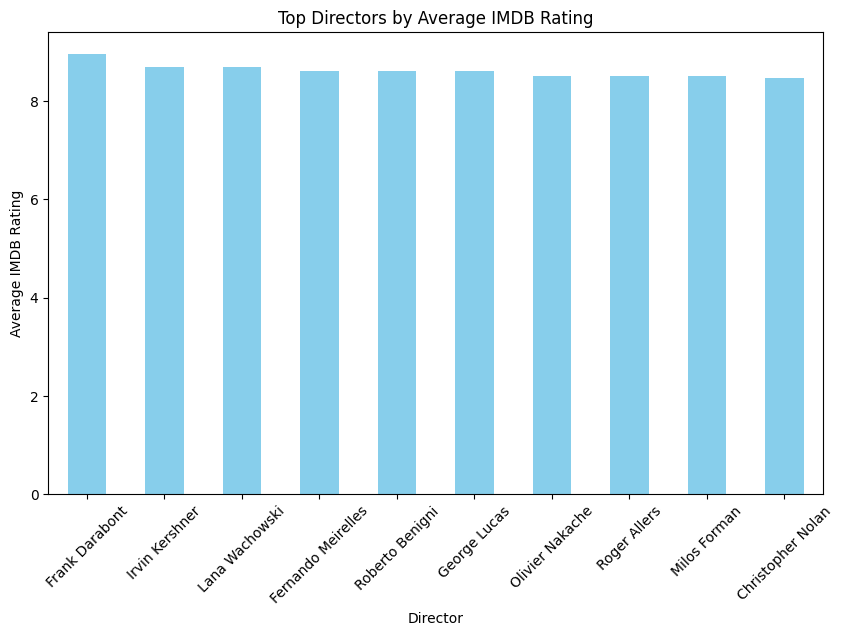

In [33]:
# Calculating the average ratings for each director and getting the top 3
top_directors = data.groupby('Director')['IMDB_Rating'].mean().sort_values(ascending=False).head(10)

# Creating the bar plot
plt.figure(figsize=(10, 6))
top_directors.plot(kind='bar', color='skyblue')
plt.title('Top Directors by Average IMDB Rating')
plt.xlabel('Director')
plt.ylabel('Average IMDB Rating')
plt.xticks(rotation=45)
plt.show()

## conclusion
* Looks like we have a winner but the results are pretty even.